### 생선 분류
- 데이터셋: fish.csv
- feature(특성)/입력 데이터: weight, Length
- 타겟/클래스/출력: Species
<br><br>
- 지도학습 / 분류
<br>
- 분류 알고리즘: KNN

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### [1] 데이터 준비

In [2]:
DATA_FILE = '../data/fish.csv'

In [3]:
# 행: Bream, Smelt
# 칼럼: Species, Weight, Height -> 0,1,2
fishDF = pd.read_csv(DATA_FILE, usecols=[0,1,2])
fishDF.head(5)

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [4]:
mask = (fishDF['Species'] == 'Bream')|(fishDF['Species'] == 'Smelt')
twoDF = fishDF[mask]
twoDF.reset_index(drop=True, inplace=True)
twoDF.head(5)

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [5]:
# Species 컬럼 수치화
names = twoDF['Species'].unique().tolist()
species_to_code = {name:idx for idx, name in enumerate(names,1)}

new_cols = twoDF.loc[:, 'Species'].replace(species_to_code)
twoDF['Fish_Code'] = new_cols
# twoDF['Code'] = twoDF['Species'].replace(species_to_code)
twoDF.head(3)

C:\Users\KDP-43\AppData\Local\Temp\ipykernel_14040\2115881680.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twoDF['Fish_Code'] = new_cols


,Species,Weight,Length,Fish_Code
0,Bream,242.0,25.4,1
1,Bream,290.0,26.3,1
2,Bream,340.0,26.5,1


#### [2] 피쳐 & 타겟 선언

In [6]:
feature = twoDF[ ['Weight','Length'] ]
target = twoDF['Fish_Code']

print(f'features => {feature.shape}, {feature.ndim}D')
print(f'target => {target.shape}, {target.ndim}D')

features => (49, 2), 2D
target => (49,), 1D


#### [3] 학습용/테스트용 데이터셋 준비

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# train : test = 80:20	==>		test_size = 0.2 or train_size = 0.8
# stratify --> 분류일 때만 사용, 분류 타겟의 종류 비율 고려
X_train, X_test, Y_train, Y_test = train_test_split(feature, target,
                                                    test_size=0.2,
                                                    stratify=target, 
                                                    random_state=10)

In [9]:
print(f'X_train => {X_train.shape}, {X_train.ndim}D')
print(f'Y_train => {Y_train.shape}, {Y_train.ndim}D')

print(f'X_test => {X_test.shape}, {X_test.ndim}D')
print(f'Y_test => {Y_test.shape}, {Y_test.ndim}D')

X_train => (39, 2), 2D
Y_train => (39,), 1D
X_test => (10, 2), 2D
Y_test => (10,), 1D


In [10]:
Y_train.value_counts()[1]

28

##### target 0(Bream), 1(Smelt) 비율 확인
- test dataset
- train dataset 비교!!

In [11]:
print(f'Train Bream ratio:	{Y_train.value_counts()[1]/Y_train.shape[0]}')
print(f'Train Smelt ratio:	{Y_train.value_counts()[2]/Y_train.shape[0]}')

Train Bream ratio:	0.717948717948718
Train Smelt ratio:	0.28205128205128205


In [12]:
print(f'Test Bream ratio:	{Y_test.value_counts()[1]/Y_test.shape[0]}')
print(f'Test Smelt ratio:	{Y_test.value_counts()[2]/Y_test.shape[0]}')

Test Bream ratio:	0.7
Test Smelt ratio:	0.3


##### [3_2] 피쳐 스케일링
- 피쳐들 간 값 범위 정규화

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
# 스케일러 인스턴스 생성
mmScaler = MinMaxScaler()

In [15]:
# 학습 진행 --> 학습 데이터에 기반해서 스케일러 인스턴스 동작을 위한 
mmScaler.fit(X_train)

MinMaxScaler()

In [16]:
mmScaler.min_, mmScaler.data_min_, mmScaler.scale_, mmScaler.data_max_

(array([-0.00674519, -0.31410256]),
 array([6.7, 9.8]),
 array([0.00100675, 0.03205128]),
 array([1000.,   41.]))

In [17]:
# 학습용 데이터셋 스케일링
X_train_scaled = mmScaler.transform(X_train)		# nd.array
X_train_scaled.shape, X_train_scaled.min(), X_train_scaled.max()

((39, 2), 0.0, 1.0000000000000002)

In [18]:
# 테스트용 데이터셋 스케일링		--> train DS로 정의된 min max scaler

X_test_scaled = mmScaler.transform(X_test)			# nd.array
X_test_scaled.shape, X_test_scaled.min(), X_test_scaled.max()

((10, 2), 0.0033222591362126247, 0.8489882210812445)

#### [4] 학습/훈련
- 학습 알고리즘 인스턴스 생성

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
# 모델 인스턴스 생성
model = KNeighborsClassifier()

In [21]:
# 학습 진행 w/ train_dataset
model.fit(X_train_scaled, Y_train)

KNeighborsClassifier()

In [22]:
# 학습 후 파라미터 확인
model.classes_,  model.n_samples_fit_

# model.feature_names_in_, --> nd.array는 컬럼명 X!

(array([1, 2], dtype=int64), 39)

#### [5] 모델 성능평가 w/ test dataset
- score 메소드

In [23]:
model.score(X_test_scaled, Y_test)

1.0

#### [6] 예측하기
- 학습/훈련 and 테스트로 사용하지 않은 데이터 사용
- 주의: 입력 데이터 Dim == 2d

In [24]:
new_data = pd.DataFrame( [ [413, 27.8]], columns=['Weight','Length'])
new_data

,Weight,Length
0,413,27.8


In [25]:
# mmScaler.data_range_, mmScaler.transform(new_data)

(array([993.3,  31.2]), array([[0.40904057, 0.57692308]]))

In [34]:
new_data_scaled = mmScaler.transform(new_data)
new_data_scaled

array([[0.40904057, 0.57692308]])

In [36]:
model.predict(new_data_scaled)


array([1], dtype=int64)

##### 최근접한 K개 데이터 찾기


In [37]:
dist, idx = model.kneighbors(new_data_scaled)
print(dist)
print()
print(idx)

[[0.04209753 0.06334927 0.07138647 0.07421737 0.07974703]]

[[25 22 21  0  6]]


In [38]:
### idx 차원 2D --> 1D
### idx array --> list
neighbors = idx.reshape(-1).tolist()		# reshpae(-1) 1차원 배열 반환
print(neighbors)

[25, 22, 21, 0, 6]


In [39]:
X_train_scaled[neighbors]

array([[0.42615524, 0.61538462],
       [0.35870331, 0.61538462],
       [0.44629014, 0.63782051],
       [0.38588543, 0.6474359 ],
       [0.44629014, 0.6474359 ]])

In [40]:
X_train_scaled[neighbors][:,0]

array([0.42615524, 0.35870331, 0.44629014, 0.38588543, 0.44629014])

In [41]:
k_weight = X_train_scaled[neighbors][:,0]
k_length = X_train_scaled[neighbors][:,1]

print(new_data_scaled)
print(k_weight, k_length, sep='\n')

[[0.40904057 0.57692308]]
[0.42615524 0.35870331 0.44629014 0.38588543 0.44629014]
[0.61538462 0.61538462 0.63782051 0.6474359  0.6474359 ]


#### [7] 시각화

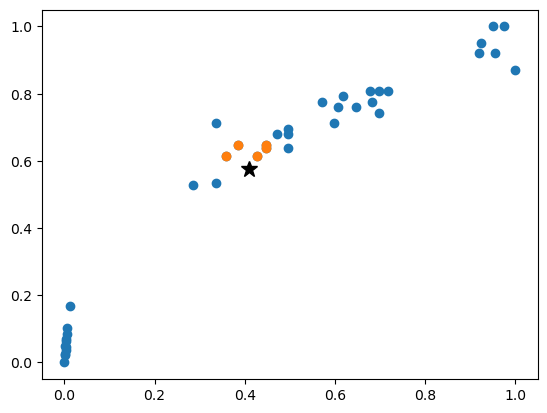

In [42]:
# plt.scatter(twoDF.loc[:35,'Weight'], twoDF.loc[:35,'Length'])
# plt.scatter(twoDF.loc[35:,'Weight'], twoDF.loc[35:,'Length'])
plt.scatter( X_train_scaled[:,0], X_train_scaled[:,1], label='TEST')
plt.plot(new_data_scaled[0,0], new_data_scaled[0,1], 'k*', markersize=12)		# 새로운 데이터 입력
plt.scatter(k_weight, k_length)
# plt.plot(twoDF.loc[neighbors,'Weight'], twoDF.loc[neighbors,'Length'], 'ro')
plt.show()

weight 값 범위 (0~1000) <br>
length 값 범위 (10~40)	<br>
			--> Weight 값에 더 가중되어 거리 계산 <br>
			--> 각 피쳐의 값 범위를 정규화(normalization)!! <br>
			--> min-max, z-score
			--> MinmaxScaler, StandardScaler 클래스 이용